# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
import pandas as pd
import cv2 

import os
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

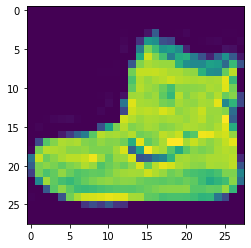

In [3]:
train=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\train.csv")
test=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\test.csv")

train_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\train\\"

##Loading Training Images
train_img=[]
for i in train['id']:
    img=cv2.imread(os.path.join(train_image_path,str(i)+'.png'),0)
    train_img.append(img)
    

plt.imshow(train_img[0])
plt.show()

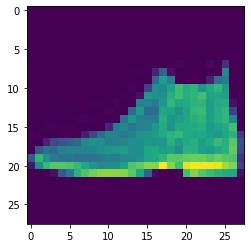

In [4]:
test_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\test\\"

##Loading Testing Images
test_img=[]
for i in test['id']:
    img=cv2.imread(os.path.join(test_image_path,str(i)+'.png'),0)
    test_img.append(img)

plt.imshow(test_img[0])

In [5]:
train_label = train['label']

In [6]:
X_train = np.array(train_img)
X_test_sub = np.array(test_img)

In [7]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test_sub = X_test_sub.reshape((X_test_sub.shape[0], -1))

In [8]:
# use only 33% of training data to expedite the training process
X_train, x_test , y_train, y_test = train_test_split(X_train, train_label, test_size = 0.67, random_state = 7)

In [9]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19800, 784) (40200, 784) (19800, 10) (40200, 10)


In [11]:
X_test_sub.shape

(10000, 784)

## Basic MLP model
- Naive MLP model without any alterations

In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [13]:
model = Sequential()

In [14]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size = 250, validation_split = 0.3, epochs = 100, verbose = 0)

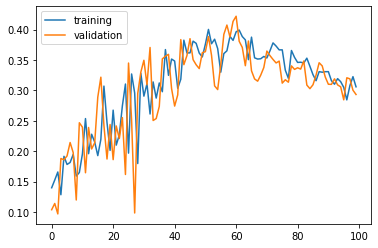

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [23]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 1ms/step - loss: 2.0709 - accuracy: 0.2941


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.294129341840744


In [27]:
# from now on, create a function to generate (return) models
def mlp_model_tune_Dense(denseCount):
    model = Sequential()
    
    model.add(Dense(denseCount, input_shape = (784, )))     # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(denseCount ))                            # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(denseCount))                            # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(denseCount))                            # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(10))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True)
    adam001 = optimizers.Adam(lr = 0.001)
    adam01 = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam001, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
for i in [50,100]:

    model = mlp_model_tune_Dense(i)
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 150, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

1257/1257 [==============================] - 2s 2ms/step - loss: 0.8008 - accuracy: 0.7104
Test accuracy for dense: 50  is 0.7103731632232666
1257/1257 [==============================] - 2s 2ms/step - loss: 0.8036 - accuracy: 0.6955
Test accuracy for dense: 100  is 0.6955472826957703


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [71]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [73]:
    model = mlp_model()
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.8952
Test accuracy for dense: 69999.png  is 0.895217776298523


In [51]:
for i in [30,50,60,64,70]:

    model = mlp_model_tune_Dense(i)
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

NameError: name 'mlp_model_tune_Dense' is not defined

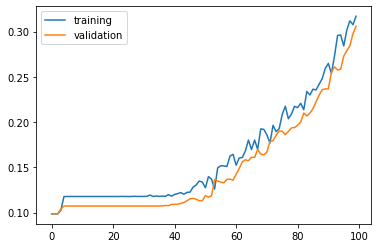

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [23]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 727us/step - loss: 2.2042 - accuracy: 0.30990s - loss: 2.2038 - accuracy - ETA: 0s - loss: 2.2036 - accu


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.30986902117729187


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>
<img src="https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png" style="width: 400px"/>
<center> **Comparision of activation** </center>

In [34]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [35]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

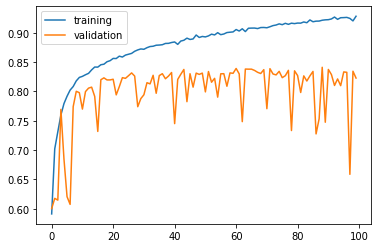

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [37]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 2ms/step - loss: 0.6456 - accuracy: 0.8185


In [38]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8185074329376221


In [39]:
import numpy as np
import pandas as pd

In [41]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_App_Elu_SGD.csv', header =  ['id', 'label' ], index = None)

## ELU Adam 

In [47]:
adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.0,    nesterov=False,    name='SGD')
momentum = optimizers.SGD(learning_rate=0.01,
    momentum=0.8,
    nesterov=False,
    name='SGD-Momentum')
opts = [adam, sgd, momentum]
adam001 = optimizers.Adam(lr = 0.001)

In [48]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))    
    
    model.compile(optimizer = adam001, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

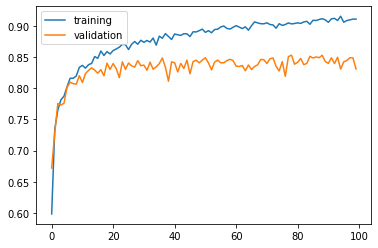

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [50]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 2ms/step - loss: 0.6024 - accuracy: 0.8357


In [51]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8356716632843018


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [26]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

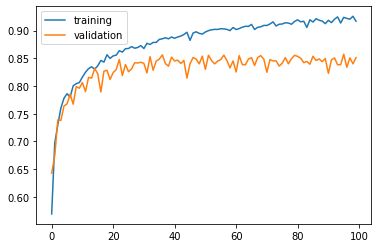

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [29]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 1s 856us/step - loss: 0.7265 - accuracy: 0.8489


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.84885573387146


In [31]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_App_Elu_adam_HENorm.csv', header =  ['id', 'label' ], index = None)

## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [12]:
from keras.layers import BatchNormalization

In [21]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001) 
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

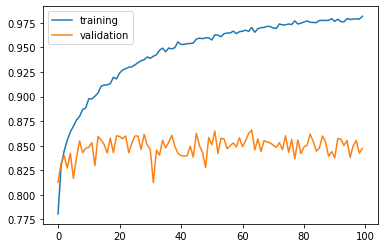

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [24]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 2ms/step - loss: 0.7453 - accuracy: 0.8524


In [25]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8524377942085266


In [67]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_App_Batch_Elu_LR_0_001_Adam.csv', header =  ['filename', 'label' ], index = None)

KeyError: 'filename'

## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [63]:
from keras.layers import Dropout

In [64]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

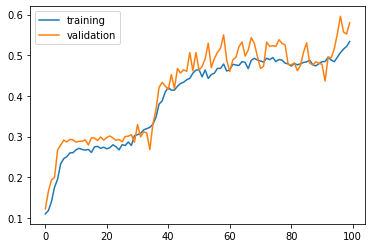

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [67]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 797us/step - loss: 1.1125 - accuracy: 0.5871


In [68]:
print('Test accuracy: ', results[1])

Test accuracy:  0.587115466594696


In [69]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut.csv', header =  ['filename', 'label' ], index = None)

## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [91]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [93]:
def mlp_model1():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [94]:
model1 = KerasClassifier(build_fn = mlp_model1, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model2, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model3, epochs = 20, verbose = 0)

In [95]:
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [96]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [97]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B19C8>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1748>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1788>)],
                 voting='soft')

In [98]:
y_pred = ensemble_clf.predict(x_test)

In [99]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9627474870545233


In [100]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Ensemble.csv', header =  ['filename', 'label' ], index = None)

## Tuning by Learning rate & decaying rate

In [77]:
from keras.layers import BatchNormalization

In [78]:
# solution
epochs = 100
learning_rate = 0.01 # initial learning rate
decay_rate = 0.01
momentum = 0.8

# define the optimizer function
adam = optimizers.Adam(lr=learning_rate)

In [79]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model_initial():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [80]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

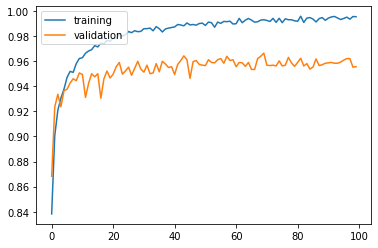

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [82]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1968 - accuracy: 0.9639


In [83]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9639354348182678


In [84]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_LR_0_1_Adam.csv', header =  ['filename', 'label' ], index = None)

#### With Elu & batch - Test accuracy:  0.963965892791748 - AV Accu - 96.7

#### With Elu, batch & Initializer - Test accuracy:  0.9626560807228088 - AV Accu - 96.5

In [88]:
def mlp_model_Initialization_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [89]:
for i in ['he_normal','random_normal','truncated_normal']:
    model = mlp_model_Initialization_Test(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2077 - accuracy: 0.9634
Test accuracy:  0.9634480476379395
1026/1026 [==============================] - 2s 2ms/step - loss: 0.2505 - accuracy: 0.9568
Test accuracy:  0.9568077921867371


In [96]:
model = mlp_model_Initialization_Test('truncated_normal')
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

results = model.evaluate(x_test, y_test)

print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2697 - accuracy: 0.9571
Test accuracy:  0.9571428298950195


In [97]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_TrucNormalInit_100Epo.csv', header =  ['filename', 'label' ], index = None)

In [93]:
from tensorflow.keras import layers
from tensorflow.keras import initializers

In [98]:
def mlp_model_Initialization_ObjTest(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [101]:
import keras

initList = [keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
,keras.initializers.Ones()
,keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
,keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
,keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)
,keras.initializers.Orthogonal(gain=1.0, seed=None)
,keras.initializers.lecun_uniform(seed=None)
,keras.initializers.glorot_normal(seed=None)
,keras.initializers.glorot_uniform(seed=None)
,keras.initializers.he_normal(seed=None)
,keras.initializers.lecun_normal(seed=None)
,keras.initializers.he_uniform(seed=None)]

In [102]:
for i in initList:
    model = mlp_model_Initialization_ObjTest(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1843 - accuracy: 0.9547
Test accuracy:  0.9547365307807922
1026/1026 [==============================] - 2s 2ms/step - loss: 0.4724 - accuracy: 0.8742
Test accuracy:  0.8742004036903381
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1759 - accuracy: 0.9555
Test accuracy:  0.9555284976959229
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1861 - accuracy: 0.9528
Test accuracy:  0.9528175592422485
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9580
Test accuracy:  0.9579652547836304
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1953 - accuracy: 0.9512
Test accuracy:  0.9512031674385071
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1644 - accuracy: 0.9580
Test accuracy:  0.9580261707305908
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1998 - accuracy: 0.9521
Test accuracy:  0.952116966

In [103]:
print('Test accuracy with Init:', i.distribution,' is', results[1])

Test accuracy with Init: <tensorflow.python.keras.initializers.initializers_v2.HeUniform object at 0x0000021E87B9BFC8>  is 0.9559853672981262


In [108]:
for i in initList:
    model = mlp_model_Initialization_ObjTest(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy-Init:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2060 - accuracy: 0.9620
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.RandomUniform object at 0x0000021E87B9B1C8>  is 0.9620164632797241
1026/1026 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.9219
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.Ones object at 0x0000021E87B9B848>  is 0.921870231628418
1026/1026 [==============================] - 2s 2ms/step - loss: 0.2337 - accuracy: 0.9611
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.RandomNormal object at 0x0000021E87B9B888>  is 0.9610722064971924
1026/1026 [==============================] - 1s 938us/step - loss: 0.2251 - accuracy: 0.9634
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x0000021E87B9BDC8>  is 0.9634480476379395
1026/1026 [==============================] - 1s 941us/step - loss: 0.2090 - accuracy: 0.9623
Accura

## Tune Optimizers

In [117]:
adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.0,    nesterov=False,    name='SGD')
momentum = optimizers.SGD(learning_rate=0.01,
    momentum=0.8,
    nesterov=False,
    name='SGD-Momentum')
opts = [adam, sgd, momentum]

In [121]:
def mlp_model_Optimization_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = i, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [122]:
for i in opts:
    model = mlp_model_Optimization_Test(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2036 - accuracy: 0.9647
Accuracy with: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021EA06C3948>  is 0.964666485786438
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1776 - accuracy: 0.9559
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3848>  is 0.9559244513511658
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1848 - accuracy: 0.9612
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9612244963645935


In [126]:
    model = mlp_model_Optimization_Test(opts[0])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1726 - accuracy: 0.9568
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9568077921867371


In [ ]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerAdam.csv', header =  ['filename', 'label' ], index = None)

In [ ]:
    model = mlp_model_Optimization_Test(opts[1])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

In [127]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerSGD.csv', header =  ['filename', 'label' ], index = None)

In [128]:
    model = mlp_model_Optimization_Test(opts[2])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9640
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9639963507652283


In [129]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerMomentum.csv', header =  ['filename', 'label' ], index = None)

## Tune Activation

In [130]:
def mlp_model_Activation_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name='Adam')
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
ActList = ['relu']

In [132]:
model = mlp_model_Activation_Test('selu')
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

results = model.evaluate(x_test, y_test)

print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2208 - accuracy: 0.9628
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.962838888168335
